# Project 2 

## Classification on the Wine dataset

Preparing the data:

In [1]:
import pandas as pd
from sklearn import datasets

In [2]:
dataset = datasets.load_wine()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
print(dataset.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [4]:
print(dataset.target_names)
#we have three classifiers

['class_0' 'class_1' 'class_2']


In [5]:
from sklearn.model_selection import train_test_split
# split the data

X= dataset['data']
y = dataset['target']

X_train, X_test, y_train, y_test= \
    train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
#random_state and stratify are nesecary to have the same split every time 

In [6]:
print(dataset['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


# KNN Classifier

let k = 4

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)

In [8]:
print('Predicted')
print(y_pred)
print('')
print('Actual')
print(y_train)

Predicted
[0 0 0 0 2 0 1 1 2 0 2 1 2 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 2 0 0 0 0 0 0 1 1 2 2 2 2 0 0 1 0 2 2 1 1 0 2 0 1 1 0 2 1 0 0 1 0 2 0 0
 2 1 1 1 2 2 2 2 1 1 0 0 1 1 1 2 1 1 1 2 0 0 0 1 1 0 1 0 1 0 1 1 0 1 2 1 2
 0 2 0 0 1 1 2 0 2 1 1 2 1]

Actual
[0 0 0 0 1 0 2 1 2 0 1 1 2 1 0 0 0 1 1 0 1 1 1 1 1 2 1 0 2 1 2 2 0 2 1 1 1
 1 2 0 0 0 0 0 0 1 1 2 0 2 0 0 0 2 0 2 1 1 1 0 1 0 1 1 0 2 1 0 0 1 1 2 0 0
 2 1 1 1 2 2 2 2 1 1 0 0 1 1 1 2 2 1 1 2 0 0 0 2 1 2 1 1 2 0 1 1 0 1 2 1 2
 0 2 0 0 1 1 2 0 2 1 2 2 1]


In [9]:
knn.score(X_train, y_train)
#this is the accuracy of training data with 4 neighbors

0.8225806451612904

# Evaluation of KNN

First, we can start off with a graph showing accuracy vs k amount of neighbors

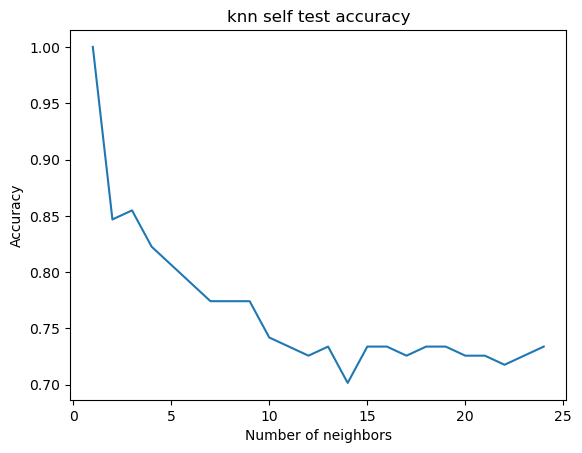

In [10]:
import numpy as np
import matplotlib.pyplot as plt

neighbors = np.arange(1, 25)
accuracy = np.empty(len(neighbors))

for i, k, in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy[i] = knn.score(X_train, y_train)
    
plt.title('knn self test accuracy')
plt.plot(neighbors, accuracy)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

From here we can see that just about 4 neighbors is optimal accuarcy 

Now below, we can take a look at the confused matrix and see where the model is struggling

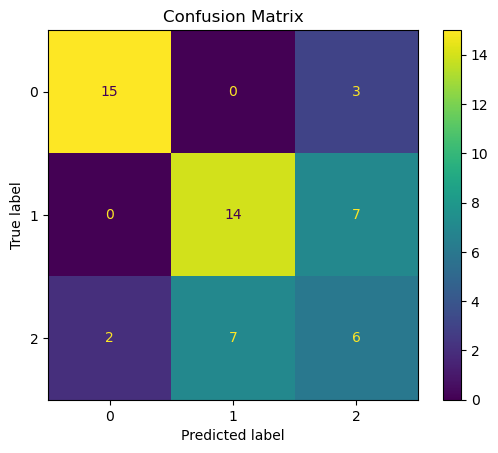

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test) # predect the test 

cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='viridis') 
plt.title("Confusion Matrix")
plt.show()

The confushed matrix shows the model has issues with predicting classes 2 and 1

Now we can print out a classfication report showing the test data compared to the predicted data

In [12]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86        18
           1       0.67      0.67      0.67        21
           2       0.38      0.40      0.39        15

    accuracy                           0.65        54
   macro avg       0.64      0.63      0.64        54
weighted avg       0.66      0.65      0.65        54



The report shows for 65% accuracy which is not good 

Now, lets try splitting the data differently. We exclude the parameters random_state and stratify. And lets set k = 3. 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [14]:
knn.score(X_train, y_train)

0.8629032258064516

Can see that the accuracy of the training data is about 80% 

And we get a slight increase of accuracy using the test data

In [15]:
knn.score(X_test, y_test)

0.5740740740740741

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.93      0.74        15
           1       0.56      0.48      0.51        21
           2       0.54      0.39      0.45        18

    accuracy                           0.57        54
   macro avg       0.57      0.60      0.57        54
weighted avg       0.56      0.57      0.55        54



When the training and test data have no overlap, we get an increase but can still have better. 

In [17]:
#knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X, y)

y_pred = knn.predict(X)
#print(y_pred)
knn.score(X, y)

0.8707865168539326

Here, we use the same dataset, we get a better accuracy. 

We can show the classification report for the actual dataset vs the predicted out come of it

In [18]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92        59
           1       0.91      0.83      0.87        71
           2       0.77      0.85      0.81        48

    accuracy                           0.87       178
   macro avg       0.87      0.87      0.87       178
weighted avg       0.87      0.87      0.87       178



We get decent results when k = 3. We will use this as k when classifying using KNN. 

# DT Classifier

Now, we will will take a look at the data when it is classified by DT

The same dataset will be used, split the same, but we will use slightly different variable names 

In [19]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [20]:
dataset = datasets.load_wine()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [21]:
x= dataset['data']
Y = dataset['target']

x_train, x_test, Y_train, Y_test= \
    train_test_split(x, Y, test_size=0.3, random_state=42, stratify=y)

In [22]:
dt = DecisionTreeClassifier(max_depth = 2, random_state = 0)

Here we will start with a max depth of 2 

In [23]:
dt.fit(x_train, Y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

Below is showing that the model is about 90% accurate to the training data 

In [24]:
dt.score(x_train, Y_train)

0.9354838709677419

# Evaluation of DT

Here we will predict the outcome of the training data

In [25]:
Y_predict = dt.predict(x_train)
print(Y_predict)

[0 0 0 0 1 0 2 0 2 0 1 1 2 1 0 0 0 1 1 0 1 1 1 1 0 2 1 0 2 1 2 2 0 2 1 1 1
 0 2 0 1 0 0 0 0 1 1 2 0 2 0 0 0 2 0 2 1 1 1 0 0 0 1 1 0 2 1 0 0 1 1 2 0 0
 2 1 1 1 2 2 2 2 1 1 0 0 1 1 1 2 2 1 1 2 0 0 0 2 1 2 1 1 2 0 0 1 0 1 2 1 2
 0 2 0 0 0 1 2 0 2 1 2 2 2]


And now, we will predict the outcome of the test data

In [26]:
Y_predict = dt.predict(x_test)
print(Y_predict)

[0 1 0 0 1 0 2 1 0 2 1 0 2 1 1 2 0 0 2 2 1 2 2 2 1 2 0 1 0 1 0 0 2 1 1 2 1
 1 1 0 2 0 0 0 0 1 1 0 2 0 1 1 2 0]


Below shows the accuracy of the testing data of the DT set to depth of 2

In [27]:
score = dt.score(x_test, Y_test)
print(score)

0.8888888888888888


In [28]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       0.89      0.81      0.85        21
           2       1.00      1.00      1.00        15

    accuracy                           0.89        54
   macro avg       0.90      0.90      0.90        54
weighted avg       0.89      0.89      0.89        54



Now below is when we compare using the testing data

In [29]:
Y_predict = dt.predict(x_test)

In [30]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       0.89      0.81      0.85        21
           2       1.00      1.00      1.00        15

    accuracy                           0.89        54
   macro avg       0.90      0.90      0.90        54
weighted avg       0.89      0.89      0.89        54



Now we can see that the accuracy is almost 90%. We can still get better.
Lets look at the confused matrix and see where the model is struggling.

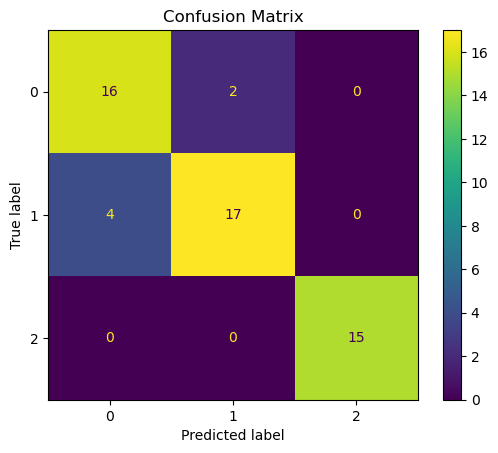

In [31]:
cm = confusion_matrix(Y_test, Y_predict)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='viridis') 
plt.title("Confusion Matrix")
plt.show()

The confused matrix shows that the model does very well in predicting the labels. But struggles with label 0 and 1.

In [32]:
from sklearn import tree

We can also display the gini value of at each node of the decision tree to show where the impurities are coming from

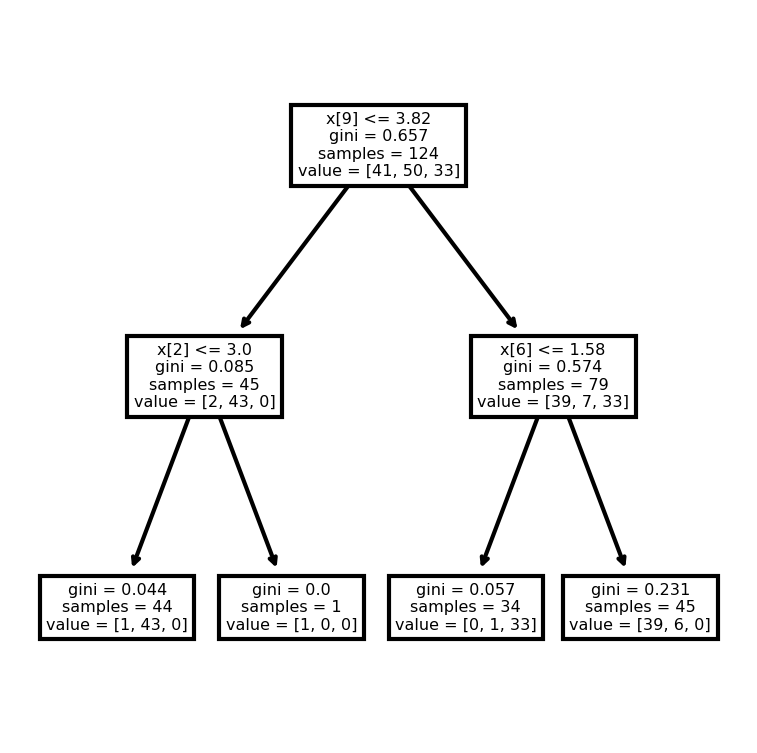

In [33]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (3,3), dpi = 300)
tree.plot_tree(dt)
plt.show()

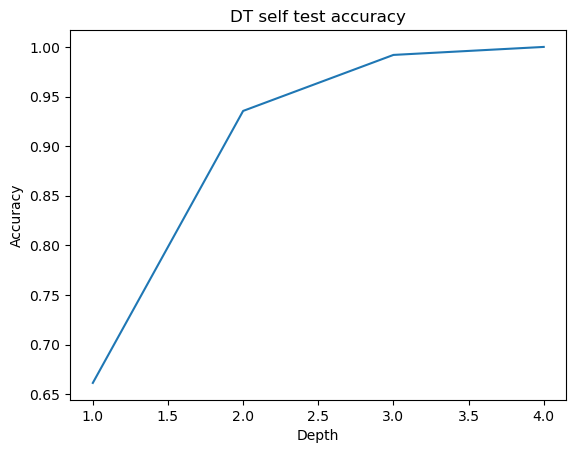

In [34]:
depth = np.arange(1, 5)
accuracy = np.empty(len(depth))

for i, k, in enumerate(depth):
    dt = DecisionTreeClassifier(max_depth = k, random_state = 0)
    dt.fit(x_train, Y_train)
    accuracy[i] = dt.score(x_train, Y_train)
    
plt.title('DT self test accuracy')
plt.plot(depth, accuracy)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

Above we can see that a depth of 2-3 is optimal for the model to not be over-fitted for training data

# KNN or DT?

After analyzing both KNN and DT classifiers, DT is a clear winner in accuracy. 

# Cross-validation Test Classification

In [35]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Now we will load in the same data set and conduct a cross-validation test classification

In [36]:
dataset = datasets.load_wine()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)
df.head()

x= dataset['data']
Y = dataset['target']

In [37]:
x_train, x_test, Y_train, Y_test= \
    train_test_split(x, Y, test_size=0.3, random_state=42, stratify=y)

We will create the decision tree and set a max depth of 2 so the model is not over fitted, as we found earlier

In [38]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 0)
dt.fit(x_train, Y_train)
dt.score(x_train, Y_train)

0.9919354838709677

After fitting the training data and scoring the accuracy of the training data, we get 99% accuracy.

In [39]:
dt.score(x_test, Y_test)

0.9814814814814815

After scoring the accuracy of the testing data we get 98% 

Now we will conduct the cross value score of each fold of the raw dataset. This will show us the accuracy of the each fold of data and how well the model does with smaller portions of the data

In [40]:
from sklearn.model_selection import cross_val_score, KFold
k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(dt, x, Y, cv = kf) # raw data

print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8490196078431372


We see that the accuracy of each fold is about 85%. Now we will look at the accuracy of each fold when the data is split

In [41]:
from sklearn.metrics import accuracy_score

data = datasets.load_wine(as_frame=True)
df = data.frame
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [42]:
k = 10
kf = KFold(n_splits=k, random_state=None)
dt = DecisionTreeClassifier(max_depth = 4, random_state = 0)

acc_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
    dt.fit(X_train, y_train)
    pred_values = dt.predict(X_test)
    
    
    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)

avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.9444444444444444, 0.8333333333333334, 0.8888888888888888, 0.6666666666666666, 0.8333333333333334, 0.9444444444444444, 0.8888888888888888, 0.7222222222222222, 0.8823529411764706, 0.9411764705882353]
Avg accuracy : 0.8545751633986928


Here we can see the individual accuracy of each fold. The fourth fold seems to be where the model is struggling. If we look at the confused matrix we can see what exactly is being confused. It is two dimensional because we split the data using the k fold function.

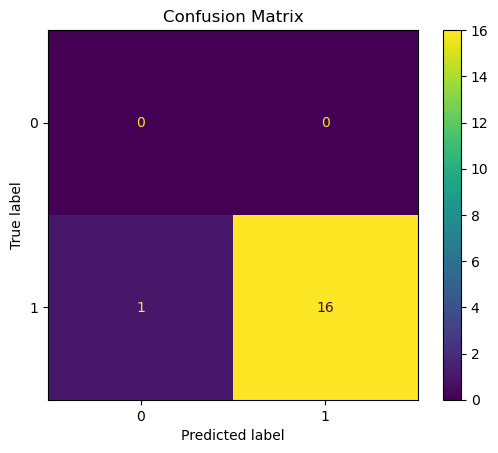

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred_values)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='viridis') 
plt.title("Confusion Matrix")
plt.show()

The confused matrix shows the model confusing class 1 for class 0. The outcomes are generalized into two classes

## SVM based hand-written digits classification

In [44]:
%matplotlib inline
import pandas as pd
import numpy as py
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import datasets
import seaborn as sns; sns.set()

In [45]:
dataset = datasets.load_digits()
print(dataset.data.shape)

(1797, 64)


<Figure size 640x480 with 0 Axes>

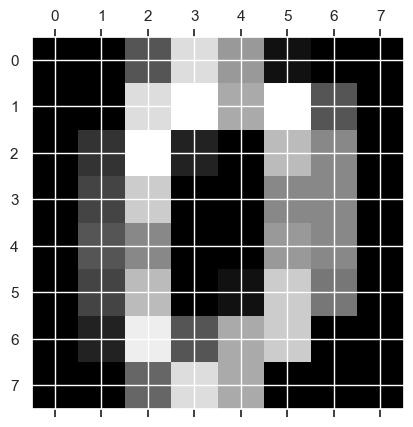

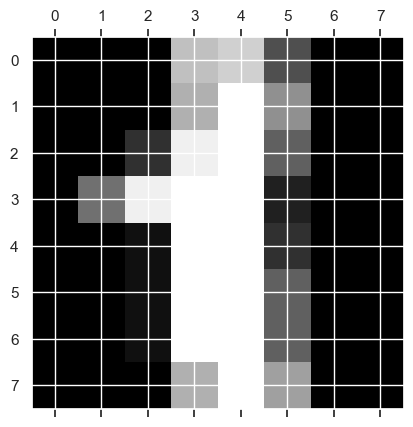

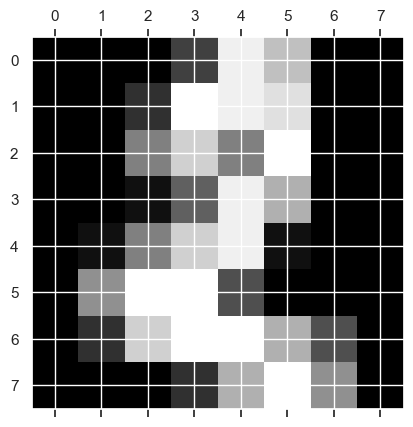

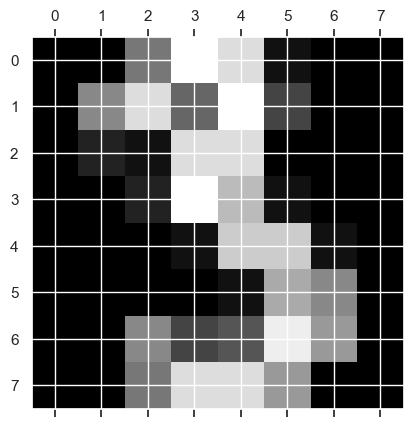

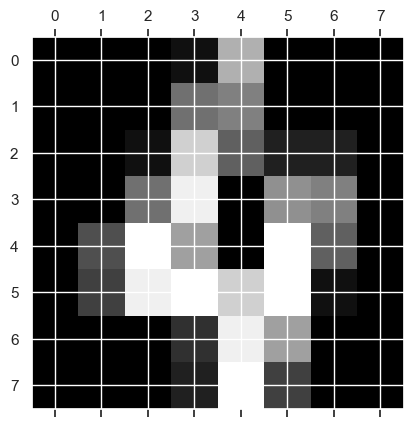

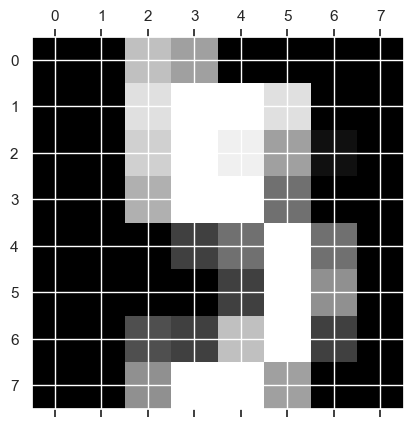

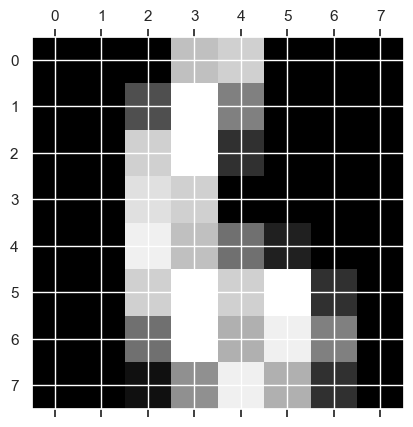

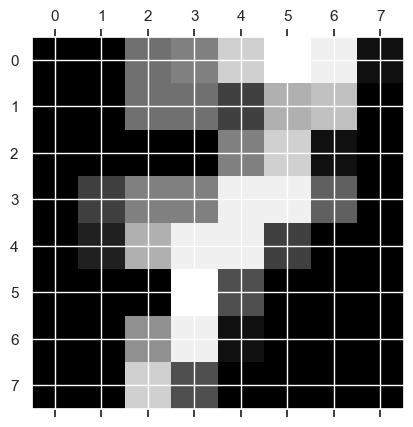

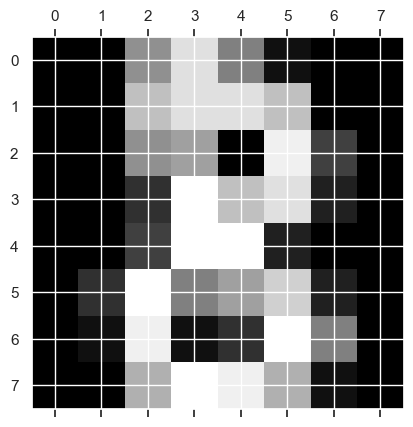

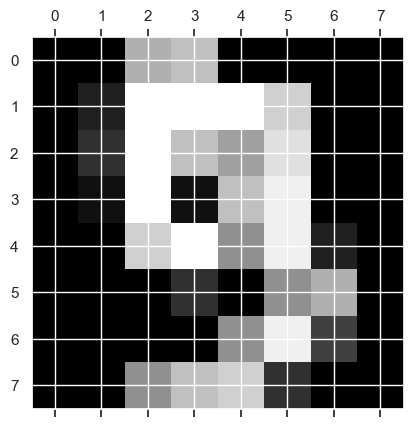

In [46]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(dataset.images[0])
plt.matshow(dataset.images[1])
plt.matshow(dataset.images[2])
plt.matshow(dataset.images[3])
plt.matshow(dataset.images[4])
plt.matshow(dataset.images[5])
plt.matshow(dataset.images[6])
plt.matshow(dataset.images[7])
plt.matshow(dataset.images[8])
plt.matshow(dataset.images[9])
plt.show()

First, we will use PCA to reduce the dimension of each sample from 64 to 32

Then we will split the data and use GridSearchCV function to find the best parameters for SVM

In [47]:
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

In [48]:
pca = RandomizedPCA(n_components=32, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [49]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(dataset.data, dataset.target, test_size=.6, random_state=42)

In [50]:
from sklearn.model_selection import GridSearchCV
param_grid= {'svc__C':[1,5,10,50],
                'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: total: 20.1 s
Wall time: 10.5 s
{'svc__C': 5, 'svc__gamma': 0.005}


In our evaluation we will start with C = 5 and gamma = 0.005 and work from there. 

# Evaluation of SVM

In this section we will evalute the accuracy of SVM

In [51]:
from sklearn.metrics import classification_report

First, we will start with the predicted values

In [52]:
svc = SVC(C=5, kernel='rbf', gamma=.005, class_weight='balanced')

In [53]:
svc.fit(Xtrain, ytrain) 

SVC(C=5, class_weight='balanced', gamma=0.005)

In [54]:
svc.score(Xtrain, ytrain)

1.0

Here we see that the training data is 100% accurate. This model may be over fitted. Lets look at the test data first.

In [55]:
svc.score(Xtest, ytest)

0.9110287303058388

We find that the accuracy of the testing data is about 91%. This could be improved. Lets take a look a the classification report first to see what classes are causing issues.

In [56]:
y_pred = svc.predict(Xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       100
           1       1.00      0.92      0.96       104
           2       1.00      0.92      0.96        96
           3       1.00      0.77      0.87       113
           4       1.00      0.89      0.94       112
           5       1.00      0.92      0.96       118
           6       1.00      0.90      0.95       119
           7       0.99      0.97      0.98       108
           8       0.51      1.00      0.68        98
           9       0.98      0.91      0.94       111

    accuracy                           0.91      1079
   macro avg       0.95      0.91      0.92      1079
weighted avg       0.95      0.91      0.92      1079



The classification report shows that class 8 has an f1 score of 68. 

Now we will plug in different values of C and gamma to try and improve the accuracy.

In [57]:
svc = SVC(C=1, kernel='rbf', gamma=.005, class_weight='balanced')

In [58]:
svc.fit(Xtrain, ytrain) 

SVC(C=1, class_weight='balanced', gamma=0.005)

In [59]:
svc.score(Xtrain, ytrain)

1.0

In [60]:
svc.score(Xtest, ytest)

0.9063948100092678

In [61]:
y_pred = svc.predict(Xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       100
           1       1.00      0.89      0.94       104
           2       1.00      0.92      0.96        96
           3       1.00      0.76      0.86       113
           4       1.00      0.89      0.94       112
           5       1.00      0.92      0.96       118
           6       1.00      0.90      0.95       119
           7       0.99      0.97      0.98       108
           8       0.50      1.00      0.67        98
           9       0.98      0.91      0.94       111

    accuracy                           0.91      1079
   macro avg       0.95      0.91      0.92      1079
weighted avg       0.95      0.91      0.92      1079



In [62]:
svc = SVC(C=10, kernel='rbf', gamma=.001, class_weight='balanced')

In [63]:
svc.fit(Xtrain, ytrain) 

SVC(C=10, class_weight='balanced', gamma=0.001)

In [64]:
svc.score(Xtrain, ytrain)

1.0

In [65]:
svc.score(Xtest, ytest)

0.9833178869323448

In [66]:
y_pred = svc.predict(Xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       0.99      1.00      1.00       104
           2       1.00      1.00      1.00        96
           3       1.00      0.95      0.97       113
           4       1.00      0.99      1.00       112
           5       0.98      0.98      0.98       118
           6       1.00      0.98      0.99       119
           7       0.96      0.99      0.98       108
           8       0.94      0.99      0.97        98
           9       0.96      0.95      0.96       111

    accuracy                           0.98      1079
   macro avg       0.98      0.98      0.98      1079
weighted avg       0.98      0.98      0.98      1079



In [67]:
svc = SVC(C=10, kernel='rbf', gamma=.0001, class_weight='balanced')

In [68]:
svc.fit(Xtrain, ytrain) 

SVC(C=10, class_weight='balanced', gamma=0.0001)

In [69]:
svc.score(Xtrain, ytrain)

1.0

In [70]:
svc.score(Xtest, ytest)

0.9703429101019463

In [71]:
y_pred = svc.predict(Xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       100
           1       0.96      0.98      0.97       104
           2       1.00      1.00      1.00        96
           3       0.99      0.94      0.96       113
           4       0.99      1.00      1.00       112
           5       0.98      0.97      0.97       118
           6       1.00      0.97      0.99       119
           7       0.93      0.98      0.95       108
           8       0.93      0.95      0.94        98
           9       0.94      0.92      0.93       111

    accuracy                           0.97      1079
   macro avg       0.97      0.97      0.97      1079
weighted avg       0.97      0.97      0.97      1079



In [72]:
svc = SVC(C=50, kernel='rbf', gamma=.005, class_weight='balanced')

In [73]:
svc.fit(Xtrain, ytrain) 

SVC(C=50, class_weight='balanced', gamma=0.005)

In [74]:
svc.score(Xtrain, ytrain)

1.0

In [75]:
svc.score(Xtest, ytest)

0.9110287303058388

In [76]:
y_pred = svc.predict(Xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       100
           1       1.00      0.92      0.96       104
           2       1.00      0.92      0.96        96
           3       1.00      0.77      0.87       113
           4       1.00      0.89      0.94       112
           5       1.00      0.92      0.96       118
           6       1.00      0.90      0.95       119
           7       0.99      0.97      0.98       108
           8       0.51      1.00      0.68        98
           9       0.98      0.91      0.94       111

    accuracy                           0.91      1079
   macro avg       0.95      0.91      0.92      1079
weighted avg       0.95      0.91      0.92      1079



In [77]:
svc = SVC(C=3, kernel='rbf', gamma=.001, class_weight='balanced')

In [78]:
svc.fit(Xtrain, ytrain) 

SVC(C=3, class_weight='balanced', gamma=0.001)

In [79]:
svc.score(Xtrain, ytrain)

1.0

In [80]:
svc.score(Xtest, ytest)

0.9833178869323448

In [81]:
y_pred = svc.predict(Xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       0.99      1.00      1.00       104
           2       1.00      1.00      1.00        96
           3       1.00      0.95      0.97       113
           4       1.00      0.99      1.00       112
           5       0.98      0.98      0.98       118
           6       1.00      0.98      0.99       119
           7       0.96      0.99      0.98       108
           8       0.94      0.99      0.97        98
           9       0.96      0.95      0.96       111

    accuracy                           0.98      1079
   macro avg       0.98      0.98      0.98      1079
weighted avg       0.98      0.98      0.98      1079



After trying different parameters. We see that changing the value of C does not effect the accuracy as much as changing the value of gamma. This made a huge difference and the highest accuracy is now 98%. We will use C=3 and gamma=0.001 as our parameters. The predicted values of SVM were close but not exact.

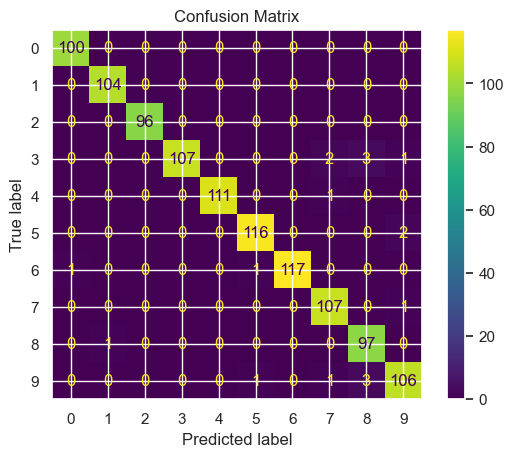

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='viridis') 
plt.title("Confusion Matrix")
plt.show()

The confused matrix shows where the model has issue classifying. 

The model has issues with identifying label 3 the most of any. 